In [1]:
# 4-12-2022
# Sumani

# https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# Task - Build a machine learning model to predict if an applicant is 'good' or 'bad' client.

In [2]:
import os, sys

# Import all required modules
import pandas as pd
import numpy as np

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline


# 1. EDA - Explotory Data Analysis

## 1.1 Read the dataset

In [6]:
# Read the dataset
credit_status_df = pd.read_csv('./input/credit_record.csv')  
application_df = pd.read_csv('./input/application_record.csv') 

## 1.2. Exploring Credit Status Dataset

In [23]:
credit_status_df.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [24]:
# How many rows are there in this dataset?
credit_status_df.shape

(1048575, 3)

<AxesSubplot:xlabel='no_of_months', ylabel='no_of_customers'>

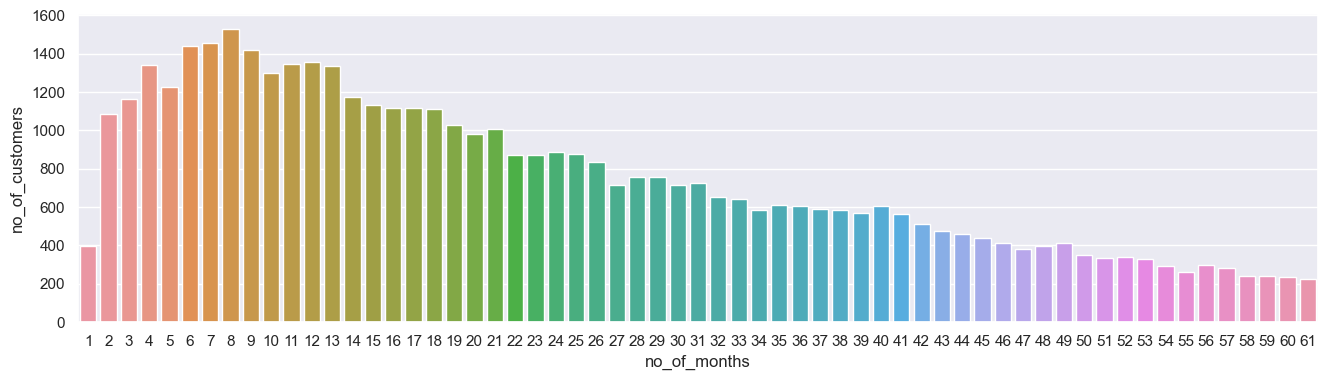

In [42]:
# Let's understand customers vs their months on the book 

df = credit_status_df.groupby('ID').count()
df = df.groupby('STATUS').count()
df = df.reset_index()
df.columns = ['no_of_months', 'no_of_customers']
plt.figure(figsize=(16,4))
sns.barplot(data=df, x="no_of_months", y="no_of_customers") 

In [43]:
credit_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [44]:
credit_status_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1048575.0,NaN,NaN,NaN,5068286.424673,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,NaN,NaN,NaN,-19.136998,14.023498,-60.0,-29.0,-17.0,-7.0,0.0
STATUS,1048575,8,C,442031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Does the dataset has any nulls?
print (credit_status_df.isna().sum())

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [49]:
# What are the unique values for each column?
df = credit_status_df
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

ID
45985
----------
MONTHS_BALANCE
61
----------
STATUS
8
----------


<AxesSubplot:>

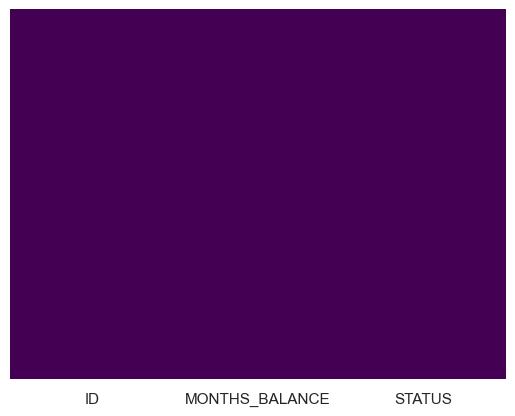

In [51]:
# Check missing values in heatmap 
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

## 1.3. Exploring application record Dataset

In [55]:
df = application_df

# Sneak peek of the data
df.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [56]:
# What is the shape of the data?
print('shape of the data is {}'.format(df.shape))


shape of the data is (438557, 18)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [60]:
# Basic Stats of the df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [61]:
# Does the dataset has any nulls?
print (df.isna().sum())

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [63]:
# What are numerical variables?
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

ID
438510
----------
CODE_GENDER
2 [('F', 294440), ('M', 144117)]
----------
FLAG_OWN_CAR
2 [('N', 275459), ('Y', 163098)]
----------
FLAG_OWN_REALTY
2 [('N', 134483), ('Y', 304074)]
----------
CNT_CHILDREN
12
----------
AMT_INCOME_TOTAL
866
----------
NAME_INCOME_TYPE
5
----------
NAME_EDUCATION_TYPE
5
----------
NAME_FAMILY_STATUS
5
----------
NAME_HOUSING_TYPE
6
----------
DAYS_BIRTH
16379
----------
DAYS_EMPLOYED
9406
----------
FLAG_MOBIL
1 [(1, 438557)]
----------
FLAG_WORK_PHONE
2 [(0, 348156), (1, 90401)]
----------
FLAG_PHONE
2 [(0, 312353), (1, 126204)]
----------
FLAG_EMAIL
2 [(0, 391102), (1, 47455)]
----------
OCCUPATION_TYPE
18
----------
CNT_FAM_MEMBERS
13
----------


In [64]:
# What are numerical variables?
numeric_data = df.select_dtypes(include=np.number)
numeric_col = numeric_data.columns 
print("Numeric Features:")
print (numeric_col)
numeric_data.head()

Numeric Features:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


In [65]:
# What are categorical variables?
categorical_data = df.select_dtypes(exclude=np.number)
categorical_col = categorical_data.columns                                                                              
print("Categorical Features:")
print(categorical_data.head())

Categorical Features:
  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY      NAME_INCOME_TYPE  \
0           M            Y               Y               Working   
1           M            Y               Y               Working   
2           M            Y               Y               Working   
3           F            N               Y  Commercial associate   
4           F            N               Y  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education        Civil marriage   Rented apartment   
1               Higher education        Civil marriage   Rented apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE  
0             NaN  
1             NaN  
2  Security staff  
3     Sales staff  
4     

<AxesSubplot:>

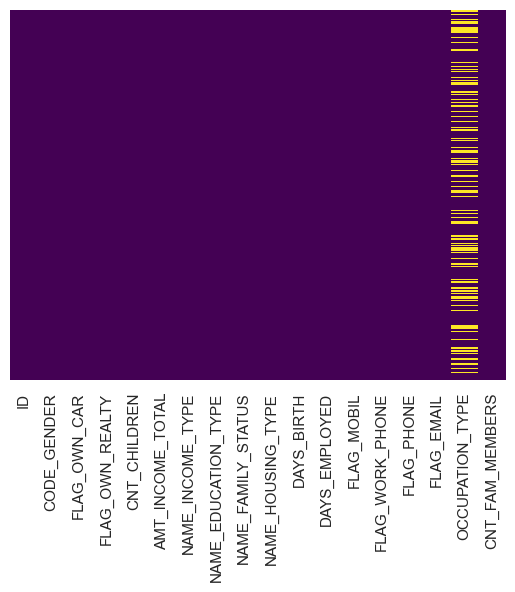

In [67]:
# Check missing values in heatmap
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

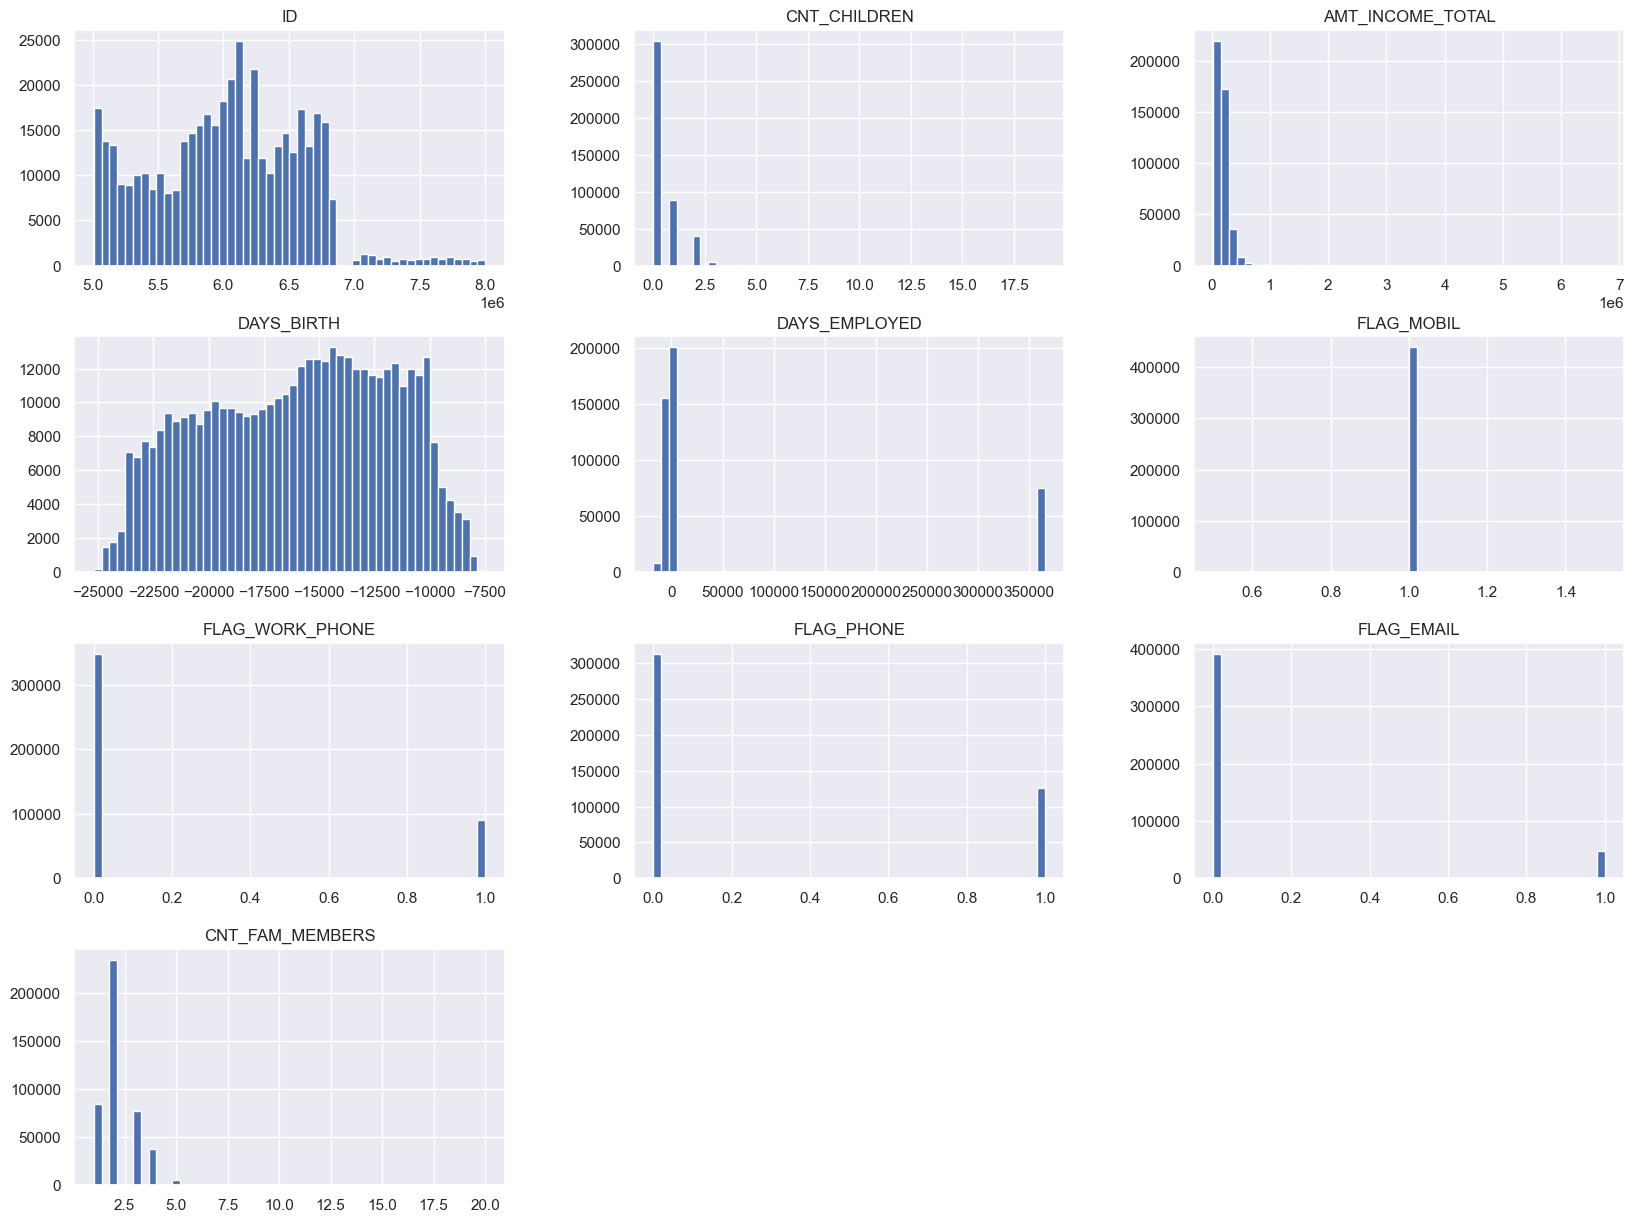

In [69]:
# Understanding Individual Columns

# This plots the distribution of the numerical columns
%matplotlib inline
import matplotlib.pyplot as plt
numeric_data.hist(bins=50, figsize=(20,15))
plt.show();

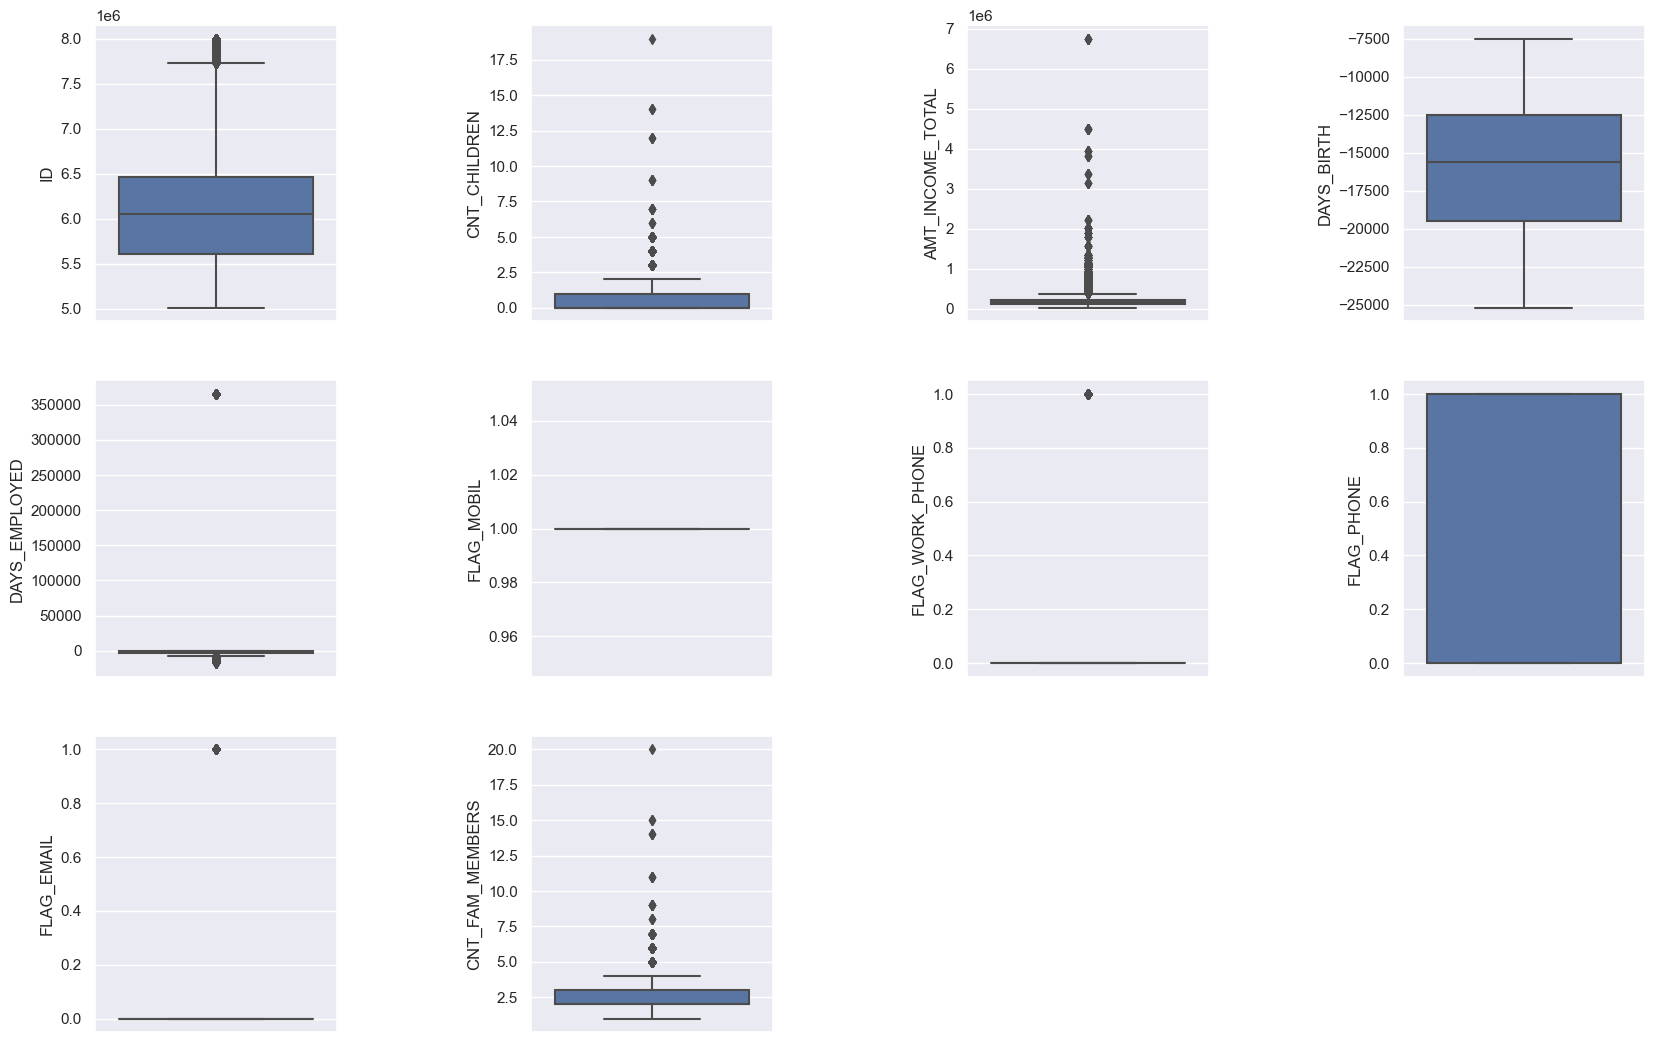

In [91]:
# Detecting outliers also another EDA. Box plot is used to detect outliers withing a single column.

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
import matplotlib.pyplot as plt
import math


l = numeric_data.columns.values
number_of_columns=4
number_of_rows = math.ceil(len(l)-1/number_of_columns)

plt.figure(figsize=(5*number_of_columns,5*number_of_rows))
plt.subplots_adjust(wspace=0.8)

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1);
    sns.boxplot(y=l[i], data=numeric_data);

CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE


<Figure size 2000x1500 with 0 Axes>

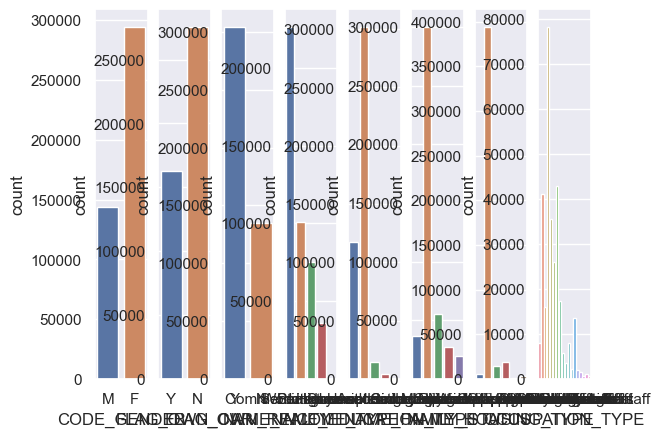

### Multi Variate Analysis

##### Understanding relationship between columns


In [93]:
list(df.columns)

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

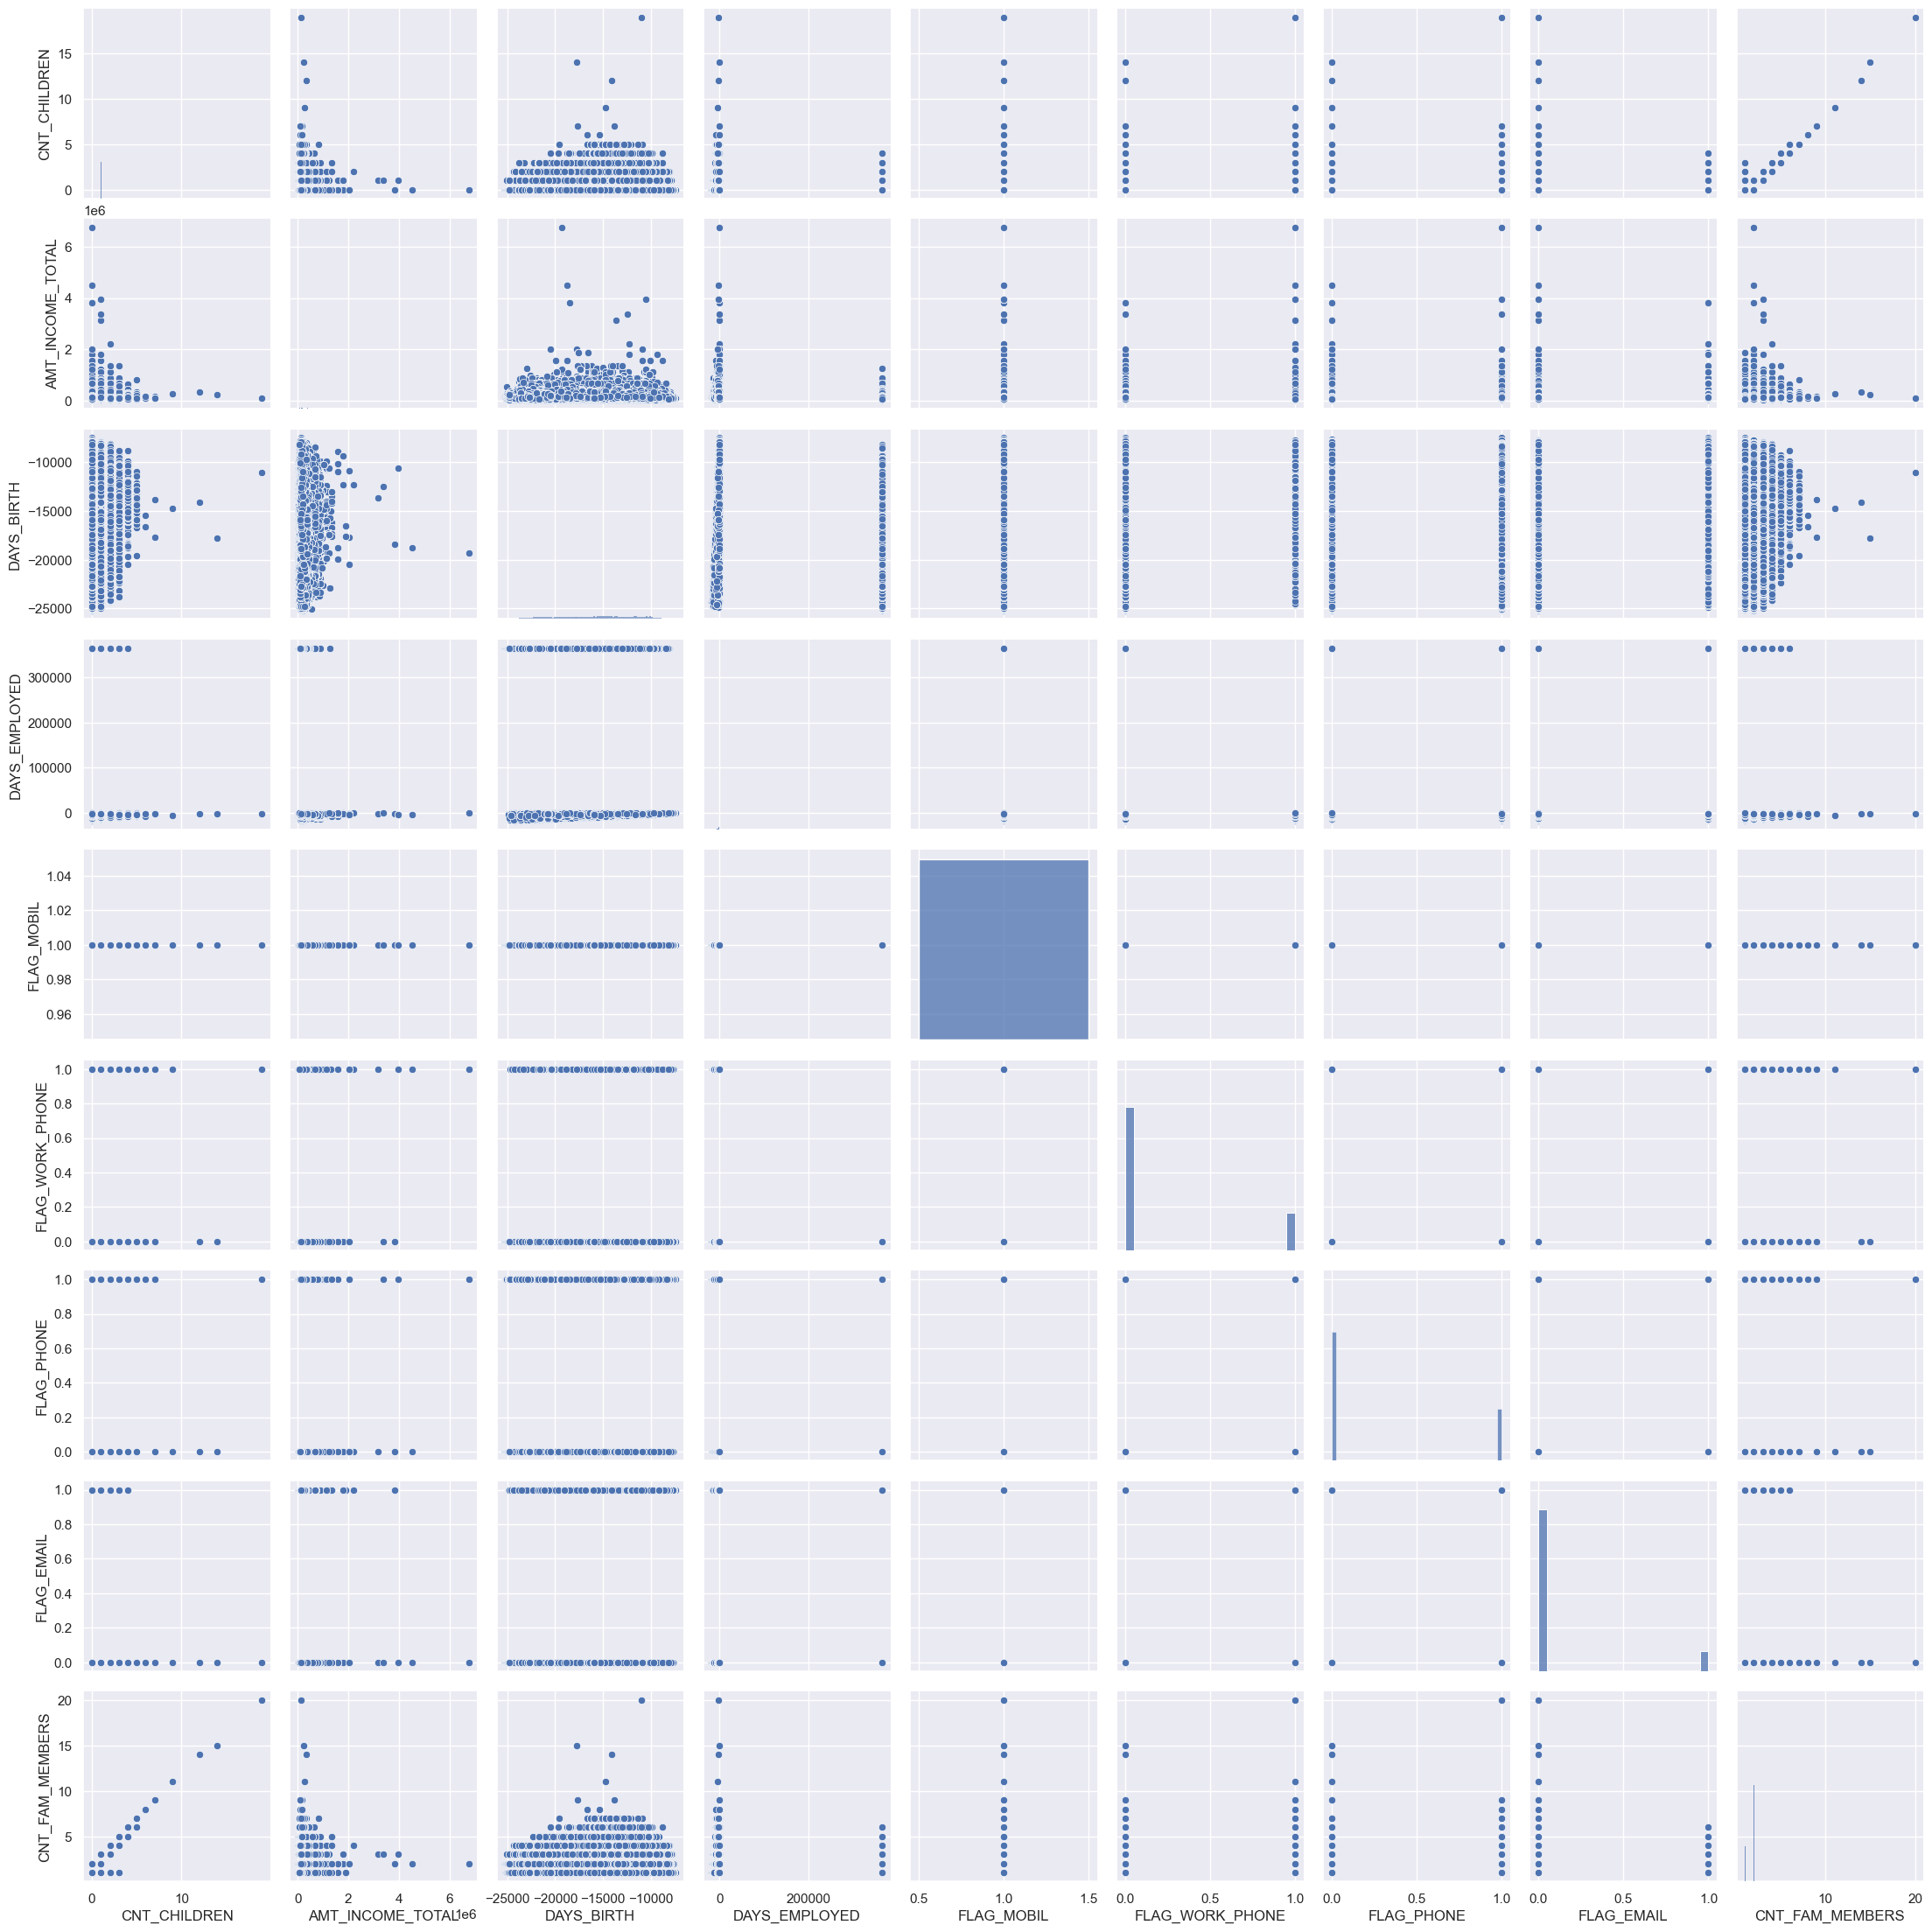

In [98]:
numeric_col = numeric_col.drop('ID')
sns.pairplot(df, vars = numeric_col)

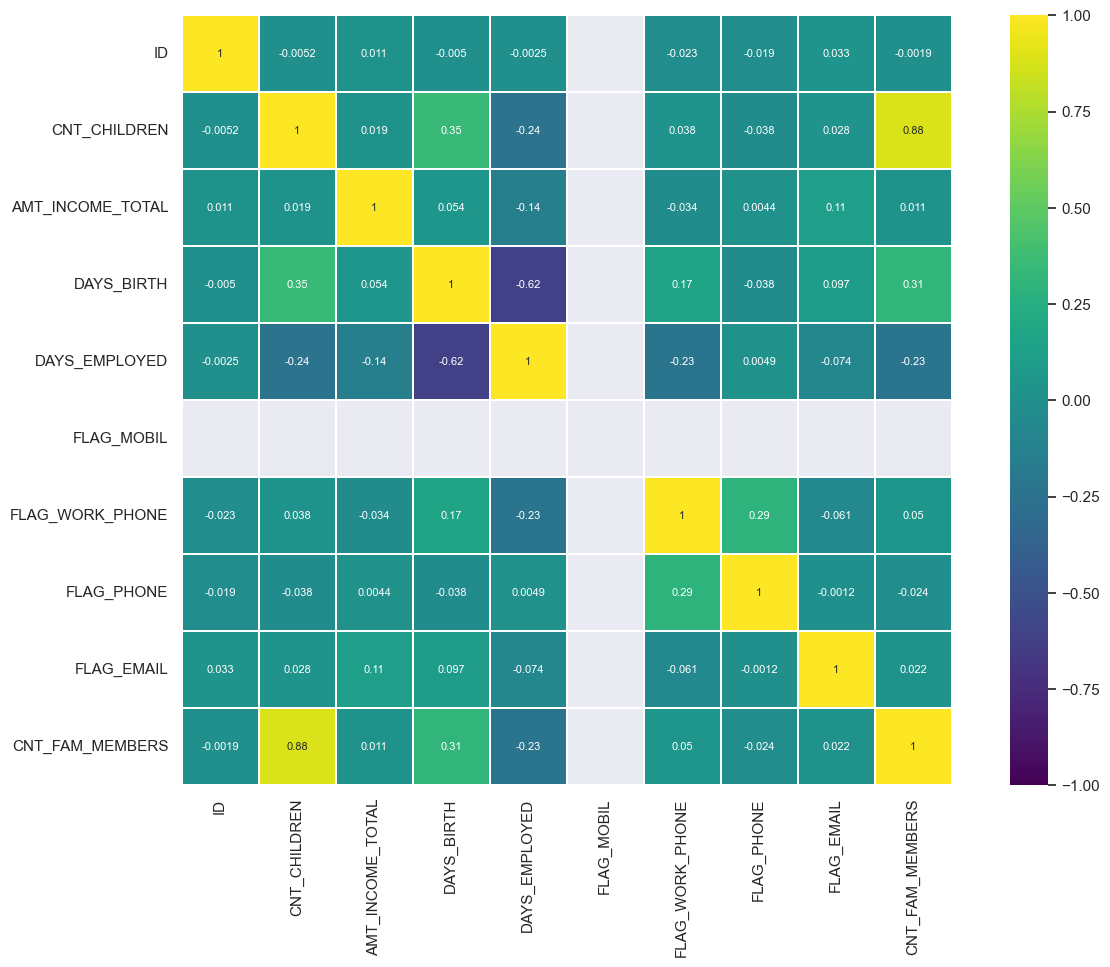

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
# sns.heatmap(df.corr(), annot=True)

corr = df.corr()
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.3,
            annot=True, annot_kws={"size": 8}, square=True);

# 2. Constructing Labels

No     45318
Yes      667
Name: target, dtype: int64


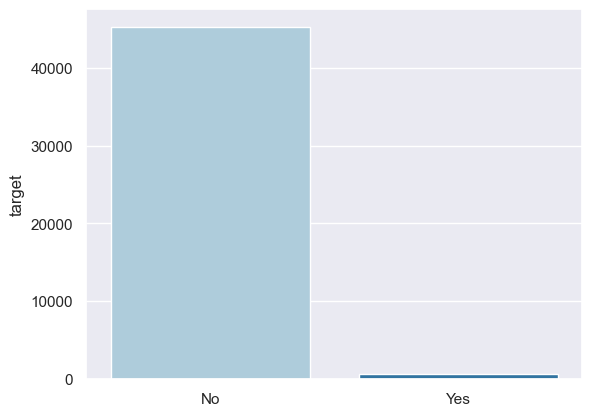

In [132]:
credit_status_df['target'] = None
credit_status_df['target'][credit_status_df['STATUS'] =='2']= 'Yes' 
credit_status_df['target'][credit_status_df['STATUS'] =='3']= 'Yes' 
credit_status_df['target'][credit_status_df['STATUS'] =='4']= 'Yes' 
credit_status_df['target'][credit_status_df['STATUS'] =='5']= 'Yes' 

customer_start_month = pd.DataFrame(credit_status_df.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
customer_start_month=customer_start_month.rename(columns={'MONTHS_BALANCE':'start_month'}) 

miss_payment_count = credit_status_df.groupby('ID').count()
miss_payment_count['target'][miss_payment_count['target'] > 0]='Yes' 
miss_payment_count['target'][miss_payment_count['target'] == 0]='No' 
cpunt = miss_payment_count[['target']]

print(miss_payment_count['target'].value_counts())

ax = sns.barplot(x=miss_payment_count['target'].value_counts().index, y=miss_payment_count['target'].value_counts(), palette='Paired')
plt.show()

# classes are highly imbalanced.